In [1]:
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import transforms

from Restformer import Restformer
from dataset import DocumentDenoisingData
from trainer import train_models

import matplotlib.pyplot as plt
from torchinfo import summary
from pathlib import Path

In [2]:
# device agnostic code 

if torch.cuda.is_available():
    device = 'cuda'
else:
    device='cpu'
device

'cuda'

In [3]:
# Hyperparameters 

LEARNING_RATE = 2e-4
BATCH_SIZE = 1
NUM_EPOCHS = 1
IMG_SIZE = 128

MODEL_SAVE_PATH = 'Models/first_train.pth'
RESULT_SAVE_PATH = 'Results/'

In [4]:
# Setting up the transforms 

input_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize(size=(IMG_SIZE,IMG_SIZE)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

target_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize(size=(IMG_SIZE,IMG_SIZE)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [5]:
# Dataset and dataloaders 

root_dir = 'data'
data = DocumentDenoisingData(root_dir=root_dir, transform=input_transform, target_transform=target_transform)
dataloader = DataLoader(dataset=data, batch_size=BATCH_SIZE, shuffle=True)
len(data), len(dataloader)

(1457, 1457)

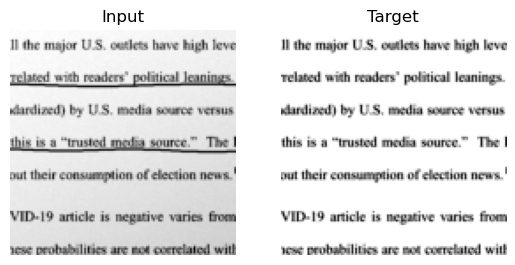

In [6]:
# visualising random samples from the data 

rnd_idx = torch.randint(0, len(dataloader), (1,))
rnd_data = data[rnd_idx]

input_img = rnd_data['Input']
target_img = rnd_data['Target']

plt.subplot(1,2,1)
plt.imshow(input_img.permute(1,2,0), cmap='gray')
plt.title('Input')
plt.axis(False);

plt.subplot(1,2,2)
plt.imshow(target_img.permute(1,2,0), cmap='gray')
plt.title('Target')
plt.axis(False);

In [7]:
# Creating model instance

model = Restformer().to(device)
model_file = Path(MODEL_SAVE_PATH)

if model_file.is_file():
    model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
    print("Model exists...")
else:
    print("Model created...")

Model created...


In [8]:
# Loss function, optimizer and scaler

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scaler = torch.amp.GradScaler()

In [ ]:
# training 

train_models(model=model, 
             dataloader=dataloader, 
             loss_fn=loss_fn, 
             optimizer=optimizer, 
             scaler=scaler, 
             NUM_EPOCHS=NUM_EPOCHS, 
             device=device, 
             model_path=MODEL_SAVE_PATH, ``
             result_path=RESULT_SAVE_PATH)

Epoch [1/1]: 100%|██████████| 1457/1457 [05:31<00:00,  4.40it/s, Batch Loss=0.025, Train Loss=0.0747]  
